<a href="https://colab.research.google.com/github/zerweck/dscommunity-hackathon/blob/hackathon1/hackathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone --branch hackathon1 https://github.com/zerweck/dscommunity-hackathon
%cd dscommunity-hackathon

Cloning into 'dscommunity-hackathon'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 31 (delta 10), reused 23 (delta 8), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [8]:
!pip install -r requirements.txt

     |████████████████████████████████| 81kB 8.3MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=2b6f1d89f206ab3a31aad5a8559dcef3e349c0489fe77c01226cd3ae51a39548
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [9]:
from script_download_data import *
import expt_settings.configs

In [ ]:
expt_name = 'electricity' # ['volatility', 'traffic', 'favorita']
folder = 'out'
# init data read
main(expt_name, True, folder)

#### Running download script ###
Resetting data folder...
Getting electricity data...
Pulling data from https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip to out/data/electricity/LD2011_2014.txt.zip
done
Unzipping file: out/data/electricity/LD2011_2014.txt.zip
Done.
Aggregating to hourly data
Processing MT_001
Processing MT_002
Processing MT_003
Processing MT_004
Processing MT_005
Processing MT_006
Processing MT_007
Processing MT_008
Processing MT_009
Processing MT_010
Processing MT_011
Processing MT_012
Processing MT_013
Processing MT_014
Processing MT_015
Processing MT_016
Processing MT_017
Processing MT_018
Processing MT_019
Processing MT_020
Processing MT_021
Processing MT_022
Processing MT_023
Processing MT_024
Processing MT_025
Processing MT_026
Processing MT_027
Processing MT_028
Processing MT_029
Processing MT_030
Processing MT_031
Processing MT_032
Processing MT_033
Processing MT_034
Processing MT_035
Processing MT_036
Processing MT_037
Process

In [ ]:
from data_formatters.electricity import ElectricityFormatter
from data_formatters.base import DataTypes, InputTypes
class CustomElectricityFormatter(ElectricityFormatter):
  """Defines and formats data for the electricity dataset. Modified for extra features support 

  Note that per-entity z-score normalization is used here, and is implemented
  across functions.
  """
  _column_definition = [
      ('id', DataTypes.REAL_VALUED, InputTypes.ID),
      ('hours_from_start', DataTypes.REAL_VALUED, InputTypes.TIME),
      ('power_usage', DataTypes.REAL_VALUED, InputTypes.TARGET),
      ('power_usage_lag24', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
      ('power_usage_lag48', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
      ('power_usage_lag72', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
      ('power_usage_lag168', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
      ('hour', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
      ('day_of_week', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
      ('hours_from_start', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
      ('categorical_id', DataTypes.CATEGORICAL, InputTypes.STATIC_INPUT),
  ]
def build_lags(data, col='power_usage', id_col='id', lags=[24, 48, 72, 168]):
    for i in lags:
      col_lag = "{}_lag{}".format(col, i)
      data[col_lag] = data.groupby(id_col)[col].shift(i)
    return data


In [ ]:
# make experiment config
ExperimentConfig = expt_settings.configs.ExperimentConfig
config = ExperimentConfig(expt_name, folder)

#prepare data formatter 
data_formatter = config.make_data_formatter()
data_csv_path = config.data_csv_path

print("Loading & splitting data...")
data = pd.read_csv(data_csv_path, index_col=0)
data_w_lags = build_lags(data.copy())


train, valid, test = data_formatter.split_data(data_w_lags.dropna())

Loading & splitting data...


/home/sandy/tftenv/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Formatting train-valid-test splits.
Setting scalers with training data...


In [ ]:
# for electricity example
raw_data = pd.read_csv('out/data/electricity/LD2011_2014.txt',  index_col=0, sep=';', decimal=',')
raw_data

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


power_usage   -4.468822e-17
dtype: float64

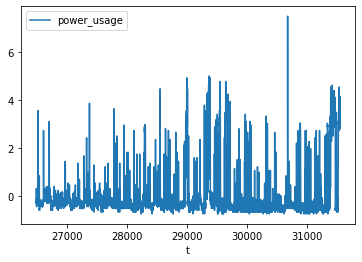

In [ ]:
import matplotlib.pyplot as plt
train.loc[train.id =='MT_001', ['t', 'power_usage']].plot(x = 't', y = 'power_usage')
train.loc[train.id =='MT_001', ['power_usage']].mean()

In [ ]:
train

,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour,power_usage_lag24,power_usage_lag48,power_usage_lag72,power_usage_lag168
17712,-0.283480,26472.0,1103,0,2014-01-08 00:00:00,MT_001,-1.661325,8,-0.499710,1,-1.731710,2,0,1.586294,2.855330,2.538071,2.538071
17713,-0.283480,26473.0,1103,0,2014-01-08 01:00:00,MT_001,-1.516862,8,-0.499710,1,-1.731030,2,1,2.220812,3.172589,2.855330,2.855330
17714,-0.132741,26474.0,1103,0,2014-01-08 02:00:00,MT_001,-1.372399,8,-0.499710,1,-1.730349,2,2,1.903553,2.855330,2.855330,2.855330
17715,-0.283480,26475.0,1103,0,2014-01-08 03:00:00,MT_001,-1.227936,8,-0.499710,1,-1.729668,2,3,1.903553,2.855330,2.855330,2.855330
17716,-0.208111,26476.0,1103,0,2014-01-08 04:00:00,MT_001,-1.083473,8,-0.499710,1,-1.728987,2,4,1.903553,2.855330,2.855330,2.538071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460738,0.277985,31555.0,1314,368,2014-08-07 19:00:00,MT_370,1.083473,7,0.002368,8,1.728987,3,19,19202.702703,24783.783784,25067.567568,25837.837838
10460739,0.069930,31556.0,1314,368,2014-08-07 20:00:00,MT_370,1.227936,7,0.002368,8,1.729668,3,20,21581.081081,24405.405405,25067.567568,24864.864865
10460740,-0.342464,31557.0,1314,368,2014-08-07 21:00:00,MT_370,1.372399,7,0.002368,8,1.730349,3,21,20256.756757,24027.027027,22972.972973,25729.729730
10460741,-0.030382,31558.0,1314,368,2014-08-07 22:00:00,MT_370,1.516862,7,0.002368,8,1.731030,3,22,19459.459459,20108.108108,22405.405405,22378.378378


In [ ]:
train.groupby('id').size()

id
MT_001    5088
MT_002    5088
MT_003    5088
MT_004    5088
MT_005    5088
          ... 
MT_366    5088
MT_367    5088
MT_368    5088
MT_369    5088
MT_370    5088
Length: 369, dtype: int64

In [ ]:
import lightgbm as lgb
# Hardcode feature names
FEATURE_NAMES = ['categorical_id', 'hours_from_start', 'categorical_day_of_week', 'categorical_hour',
                               'power_usage_lag24', 'power_usage_lag48', 'power_usage_lag72', 'power_usage_lag168']
CAT_NAMES = ['categorical_id', 'categorical_day_of_week', 'categorical_hour']

# construct lgb datasets
train_data = lgb.Dataset(train[FEATURE_NAMES], 
                         label=train[['power_usage']], 
                         feature_name=FEATURE_NAMES, 
                         categorical_feature=CAT_NAMES)

val_data = lgb.Dataset(valid[FEATURE_NAMES], 
                       label=valid[['power_usage']], 
                         feature_name=FEATURE_NAMES, 
                         categorical_feature=CAT_NAMES)


In [ ]:
valid[FEATURE_NAMES].dtypes

categorical_id               int64
hours_from_start           float64
categorical_day_of_week      int64
categorical_hour             int64
power_usage_lag24          float64
power_usage_lag48          float64
power_usage_lag72          float64
power_usage_lag168         float64
dtype: object

In [ ]:
# define hyperparameters
num_round = 2000
param = {'num_leaves': 31, 'objective': 'regression', "learning_rate":0.01, "num_threads":6}
# build model
fit = lgb.train(param, train_data, num_round, valid_sets=[val_data])

/home/sandy/tftenv/lib/python3.6/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1673
[LightGBM] [Info] Number of data points in the train set: 1861544, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000
[1]	valid_0's l2: 1.31918
[2]	valid_0's l2: 1.30283
[3]	valid_0's l2: 1.2875
[4]	valid_0's l2: 1.27195
[5]	valid_0's l2: 1.25725
[6]	valid_0's l2: 1.24255

/home/sandy/tftenv/lib/python3.6/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/sandy/tftenv/lib/python3.6/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[7]	valid_0's l2: 1.22792
[8]	valid_0's l2: 1.21388
[9]	valid_0's l2: 1.19968
[10]	valid_0's l2: 1.18577
[11]	valid_0's l2: 1.17259
[12]	valid_0's l2: 1.1593
[13]	valid_0's l2: 1.14672
[14]	valid_0's l2: 1.13378
[15]	valid_0's l2: 1.12169
[16]	valid_0's l2: 1.10939
[17]	valid_0's l2: 1.09766
[18]	valid_0's l2: 1.08548
[19]	valid_0's l2: 1.07376
[20]	valid_0's l2: 1.06279
[21]	valid_0's l2: 1.05167
[22]	valid_0's l2: 1.04057
[23]	valid_0's l2: 1.03013
[24]	valid_0's l2: 1.01951
[25]	valid_0's l2: 1.00963
[26]	valid_0's l2: 0.999455
[27]	valid_0's l2: 0.989553
[28]	valid_0's l2: 0.978924
[29]	valid_0's l2: 0.969212
[30]	valid_0's l2: 0.959851
[31]	valid_0's l2: 0.950491
[32]	valid_0's l2: 0.940886
[33]	valid_0's l2: 0.93174
[34]	valid_0's l2: 0.922187
[35]	valid_0's l2: 0.913105
[36]	valid_0's l2: 0.904646
[37]	valid_0's l2: 0.896006
[38]	valid_0's l2: 0.88785
[39]	valid_0's l2: 0.87941
[40]	valid_0's l2: 0.871177
[41]	valid_0's l2: 0.863445
[42]	valid_0's l2: 0.855371
[43]	valid_0's l2

[299]	valid_0's l2: 0.335199
[300]	valid_0's l2: 0.33457
[301]	valid_0's l2: 0.334107
[302]	valid_0's l2: 0.333547
[303]	valid_0's l2: 0.333091
[304]	valid_0's l2: 0.332484
[305]	valid_0's l2: 0.331936
[306]	valid_0's l2: 0.331351
[307]	valid_0's l2: 0.330894
[308]	valid_0's l2: 0.330347
[309]	valid_0's l2: 0.329758
[310]	valid_0's l2: 0.329248
[311]	valid_0's l2: 0.328796
[312]	valid_0's l2: 0.32833
[313]	valid_0's l2: 0.32793
[314]	valid_0's l2: 0.327452
[315]	valid_0's l2: 0.326918
[316]	valid_0's l2: 0.326325
[317]	valid_0's l2: 0.325893
[318]	valid_0's l2: 0.325376
[319]	valid_0's l2: 0.324819
[320]	valid_0's l2: 0.324265
[321]	valid_0's l2: 0.323768
[322]	valid_0's l2: 0.32325
[323]	valid_0's l2: 0.322732
[324]	valid_0's l2: 0.322346
[325]	valid_0's l2: 0.321869
[326]	valid_0's l2: 0.321459
[327]	valid_0's l2: 0.320999
[328]	valid_0's l2: 0.320591
[329]	valid_0's l2: 0.320083
[330]	valid_0's l2: 0.319682
[331]	valid_0's l2: 0.319242
[332]	valid_0's l2: 0.31889
[333]	valid_0's l2:

[585]	valid_0's l2: 0.250202
[586]	valid_0's l2: 0.250017
[587]	valid_0's l2: 0.249913
[588]	valid_0's l2: 0.249763
[589]	valid_0's l2: 0.249531
[590]	valid_0's l2: 0.249369
[591]	valid_0's l2: 0.249176
[592]	valid_0's l2: 0.248976
[593]	valid_0's l2: 0.248816
[594]	valid_0's l2: 0.248654
[595]	valid_0's l2: 0.248421
[596]	valid_0's l2: 0.248283
[597]	valid_0's l2: 0.248048
[598]	valid_0's l2: 0.247888
[599]	valid_0's l2: 0.247778
[600]	valid_0's l2: 0.247633
[601]	valid_0's l2: 0.247395
[602]	valid_0's l2: 0.247235
[603]	valid_0's l2: 0.247081
[604]	valid_0's l2: 0.246952
[605]	valid_0's l2: 0.246749
[606]	valid_0's l2: 0.246626
[607]	valid_0's l2: 0.246453
[608]	valid_0's l2: 0.246335
[609]	valid_0's l2: 0.246168
[610]	valid_0's l2: 0.246033
[611]	valid_0's l2: 0.24596
[612]	valid_0's l2: 0.24581
[613]	valid_0's l2: 0.245684
[614]	valid_0's l2: 0.245542
[615]	valid_0's l2: 0.245435
[616]	valid_0's l2: 0.245227
[617]	valid_0's l2: 0.245082
[618]	valid_0's l2: 0.244955
[619]	valid_0's 

[874]	valid_0's l2: 0.215805
[875]	valid_0's l2: 0.215769
[876]	valid_0's l2: 0.215687
[877]	valid_0's l2: 0.215607
[878]	valid_0's l2: 0.215533
[879]	valid_0's l2: 0.215467
[880]	valid_0's l2: 0.21523
[881]	valid_0's l2: 0.215161
[882]	valid_0's l2: 0.215099
[883]	valid_0's l2: 0.215038
[884]	valid_0's l2: 0.214978
[885]	valid_0's l2: 0.214741
[886]	valid_0's l2: 0.214693
[887]	valid_0's l2: 0.214626
[888]	valid_0's l2: 0.214533
[889]	valid_0's l2: 0.214503
[890]	valid_0's l2: 0.214446
[891]	valid_0's l2: 0.214356
[892]	valid_0's l2: 0.214301
[893]	valid_0's l2: 0.214234
[894]	valid_0's l2: 0.214149
[895]	valid_0's l2: 0.21408
[896]	valid_0's l2: 0.214024
[897]	valid_0's l2: 0.213796
[898]	valid_0's l2: 0.213736
[899]	valid_0's l2: 0.213672
[900]	valid_0's l2: 0.213443
[901]	valid_0's l2: 0.213382
[902]	valid_0's l2: 0.21332
[903]	valid_0's l2: 0.213227
[904]	valid_0's l2: 0.213014
[905]	valid_0's l2: 0.212949
[906]	valid_0's l2: 0.212884
[907]	valid_0's l2: 0.212661
[908]	valid_0's l

[1157]	valid_0's l2: 0.198182
[1158]	valid_0's l2: 0.198155
[1159]	valid_0's l2: 0.198134
[1160]	valid_0's l2: 0.198094
[1161]	valid_0's l2: 0.198063
[1162]	valid_0's l2: 0.198035
[1163]	valid_0's l2: 0.198015
[1164]	valid_0's l2: 0.197975
[1165]	valid_0's l2: 0.197942
[1166]	valid_0's l2: 0.197902
[1167]	valid_0's l2: 0.197861
[1168]	valid_0's l2: 0.197817
[1169]	valid_0's l2: 0.1978
[1170]	valid_0's l2: 0.19777
[1171]	valid_0's l2: 0.197736
[1172]	valid_0's l2: 0.197701
[1173]	valid_0's l2: 0.197645
[1174]	valid_0's l2: 0.197604
[1175]	valid_0's l2: 0.197413
[1176]	valid_0's l2: 0.197381
[1177]	valid_0's l2: 0.197343
[1178]	valid_0's l2: 0.197327
[1179]	valid_0's l2: 0.197297
[1180]	valid_0's l2: 0.197262
[1181]	valid_0's l2: 0.197233
[1182]	valid_0's l2: 0.1972
[1183]	valid_0's l2: 0.197124
[1184]	valid_0's l2: 0.197095
[1185]	valid_0's l2: 0.19693
[1186]	valid_0's l2: 0.196899
[1187]	valid_0's l2: 0.19688
[1188]	valid_0's l2: 0.196851
[1189]	valid_0's l2: 0.196831
[1190]	valid_0's 

[1436]	valid_0's l2: 0.188372
[1437]	valid_0's l2: 0.18835
[1438]	valid_0's l2: 0.188301
[1439]	valid_0's l2: 0.188274
[1440]	valid_0's l2: 0.188263
[1441]	valid_0's l2: 0.188246
[1442]	valid_0's l2: 0.188206
[1443]	valid_0's l2: 0.188191
[1444]	valid_0's l2: 0.188129
[1445]	valid_0's l2: 0.188102
[1446]	valid_0's l2: 0.188088
[1447]	valid_0's l2: 0.188061
[1448]	valid_0's l2: 0.188016
[1449]	valid_0's l2: 0.187998
[1450]	valid_0's l2: 0.18799
[1451]	valid_0's l2: 0.187962
[1452]	valid_0's l2: 0.187953
[1453]	valid_0's l2: 0.187941
[1454]	valid_0's l2: 0.187915
[1455]	valid_0's l2: 0.187905
[1456]	valid_0's l2: 0.187863
[1457]	valid_0's l2: 0.187839
[1458]	valid_0's l2: 0.18779
[1459]	valid_0's l2: 0.187753
[1460]	valid_0's l2: 0.187739
[1461]	valid_0's l2: 0.187696
[1462]	valid_0's l2: 0.187677
[1463]	valid_0's l2: 0.187645
[1464]	valid_0's l2: 0.187621
[1465]	valid_0's l2: 0.187599
[1466]	valid_0's l2: 0.187581
[1467]	valid_0's l2: 0.187561
[1468]	valid_0's l2: 0.187519
[1469]	valid_

[1718]	valid_0's l2: 0.183376
[1719]	valid_0's l2: 0.183361
[1720]	valid_0's l2: 0.183349
[1721]	valid_0's l2: 0.183341
[1722]	valid_0's l2: 0.183329
[1723]	valid_0's l2: 0.183294
[1724]	valid_0's l2: 0.183314
[1725]	valid_0's l2: 0.183304
[1726]	valid_0's l2: 0.183288
[1727]	valid_0's l2: 0.183274
[1728]	valid_0's l2: 0.183249
[1729]	valid_0's l2: 0.183242
[1730]	valid_0's l2: 0.183229
[1731]	valid_0's l2: 0.183213
[1732]	valid_0's l2: 0.183201
[1733]	valid_0's l2: 0.18324
[1734]	valid_0's l2: 0.183225
[1735]	valid_0's l2: 0.183213
[1736]	valid_0's l2: 0.183192
[1737]	valid_0's l2: 0.183178
[1738]	valid_0's l2: 0.183169
[1739]	valid_0's l2: 0.183159
[1740]	valid_0's l2: 0.18315
[1741]	valid_0's l2: 0.183136
[1742]	valid_0's l2: 0.183167
[1743]	valid_0's l2: 0.183152
[1744]	valid_0's l2: 0.183129
[1745]	valid_0's l2: 0.18309
[1746]	valid_0's l2: 0.183064
[1747]	valid_0's l2: 0.183047
[1748]	valid_0's l2: 0.183035
[1749]	valid_0's l2: 0.18302
[1750]	valid_0's l2: 0.183007
[1751]	valid_0

[1997]	valid_0's l2: 0.180648
[1998]	valid_0's l2: 0.180637
[1999]	valid_0's l2: 0.180626
[2000]	valid_0's l2: 0.180618


In [ ]:
# make predictions
preds = fit.predict(test[FEATURE_NAMES])
preds

array([ 1.72746408,  1.59342381,  1.45869188, ...,  0.08565064,
        0.04239377, -0.14614362])

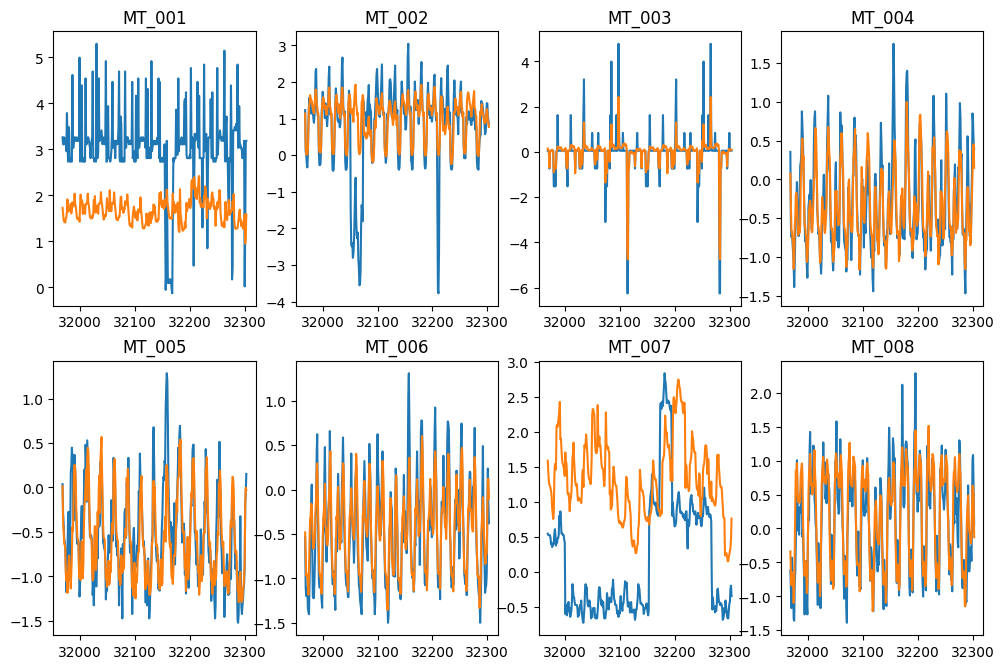

In [ ]:
# some plots
import matplotlib.pyplot as plt
nrow = 4

fig, ax = plt.subplots(2, nrow, figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
ids = np.unique(test.id)[:8]
for i in range(8):
    ax[i//nrow,i%nrow].plot(test.loc[test.id == ids[i], 't'], test.loc[test.id == ids[i], 'power_usage'])
    ax[i//nrow,i%nrow].plot(test.loc[test.id == ids[i], 't'], preds[test.id == ids[i]])
    ax[i//nrow,i%nrow].set_title(ids[i])


#plt.plot(test.t, preds)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

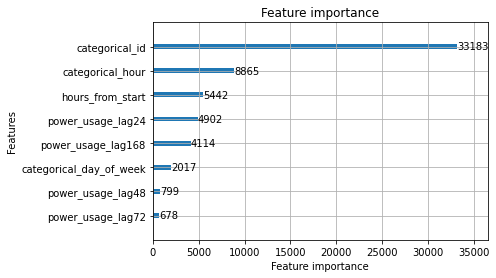

In [ ]:
lgb.plot_importance(fit)

In [ ]:
np.sqrt(np.mean((test.power_usage - preds)**2))

0.4344115560839407